<a href="https://colab.research.google.com/github/yandexdataschool/MLatImperial2022/blob/main/Seminars/lab03_1_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear classification

We'll try to solve clients' churn task using data of mobile network operator.

We have to predict whether customer will change the mobile network operator.

The target field here is 'Churn'.

Let's transform raw data, then make a Logistic Regression model and adjust it's parameteres.

Upload data and have a look at it

In [ ]:
!wget -N https://raw.githubusercontent.com/yandexdataschool/MLatImperial2022/main/Data/telecom_churn2.csv

--2022-01-27 13:05:30--  https://raw.githubusercontent.com/yandexdataschool/MLatImperial2022/main/Data/telecom_churn2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 283308 (277K) [text/plain]
Saving to: ‘telecom_churn2.csv’

telecom_churn2.csv  100%[===================>] 276.67K  --.-KB/s    in 0.03s   

Last-modified header missing -- time-stamps turned off.
2022-01-27 13:05:31 (8.18 MB/s) - ‘telecom_churn2.csv’ saved [283308/283308]



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

random_state=0
df = pd.read_csv('telecom_churn2.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415.0,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415.0,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415.0,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408.0,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415.0,Yes,No,0,166.7,113,NaN,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Transform target and  some other fields

In [ ]:
d = {'Yes' : 1, 'No' : 0}
df['International plan'] = df['International plan'].map(d)
df['Voice mail plan'] = df['Voice mail plan'].map(d)
df['Churn'] = df['Churn'].astype('int8')
df.head()


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415.0,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415.0,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415.0,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408.0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415.0,1,0,0,166.7,113,NaN,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [ ]:
#<YOUR TURN>
# find out how many missing values (numerical and categorical) are there.
df.isna().sum() 

State                     0
Account length            0
Area code                 1
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          1
Total eve minutes         0
Total eve calls           0
Total eve charge          2
Total night minutes       0
Total night calls         0
Total night charge        1
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

Divide data to design matrix X and target vector y.

Make a train-test split

In [ ]:
df.head()
y=df['Churn']
X=df.drop('Churn',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,
                                                    random_state=0)

In [ ]:
X.describe()


,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3332.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3332.000000,3333.000000,3333.000000,3331.000000,3333.000000,3333.000000,3332.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.189076,0.096910,0.276628,8.099010,179.775098,100.435644,30.562974,200.980348,100.114311,17.082324,200.872037,100.107711,9.038454,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.375907,0.295879,0.447398,13.688365,54.467389,20.069084,9.260744,50.713844,19.922625,4.310339,50.573847,19.568609,2.275659,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.425000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.797500,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
#<YOUR TURN>
# analyse feature 'Area code' and transform it if nessesary
X['Area code'].unique()
X['Area code']=X['Area code'].astype(np.object)
X.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,OK,75,415,1,0,0,166.7,113,NaN,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


Further we need to:
- Impute missing numeric and categorical values.

- Separate numerical and categorical fields.

- Scale numerical features

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

numeric_data = X_train.select_dtypes([np.number])
numeric_data_mean = numeric_data.mean()
X_train = X_train.fillna(numeric_data_mean)
#or use inplace = True
X_test = X_test.fillna(numeric_data_mean)
X_train.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
1460,MT,80,415.0,0,0,0,198.1,160,33.68,156.7,87,13.32,182.1,76,8.19,9.3,3,2.51,3
2000,PA,28,415.0,0,0,0,168.2,87,28.59,161.7,92,13.74,192.4,112,8.66,10.1,3,2.73,3
666,OR,120,415.0,0,0,0,252.0,120,42.84,150.2,106,12.77,151.8,96,6.83,9.6,1,2.59,2
2962,SD,105,415.0,0,0,0,251.6,88,42.77,175.1,103,14.88,184.4,112,8.30,5.4,5,1.46,1
2773,NJ,134,510.0,0,1,34,247.2,105,42.02,225.5,133,19.17,186.3,76,8.38,6.1,5,1.65,2


In [ ]:
numeric_data_mean

Account length            100.351463
Area code                 437.360225
International plan          0.093398
Voice mail plan             0.274944
Number vmail messages       7.998500
Total day minutes         179.960315
Total day calls           100.424231
Total day charge           30.593792
Total eve minutes         201.581808
Total eve calls           100.087022
Total eve charge           17.133176
Total night minutes       201.218492
Total night calls         100.057389
Total night charge          9.053824
Total intl minutes         10.240548
Total intl calls            4.477494
Total intl charge           2.765439
Customer service calls      1.554389
dtype: float64

In [ ]:
numeric_data.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
1460,80,415.0,0,0,0,198.1,160,33.68,156.7,87,13.32,182.1,76,8.19,9.3,3,2.51,3
2000,28,415.0,0,0,0,168.2,87,28.59,161.7,92,13.74,192.4,112,8.66,10.1,3,2.73,3
666,120,415.0,0,0,0,252.0,120,42.84,150.2,106,12.77,151.8,96,6.83,9.6,1,2.59,2
2962,105,415.0,0,0,0,251.6,88,42.77,175.1,103,14.88,184.4,112,8.30,5.4,5,1.46,1
2773,134,510.0,0,1,34,247.2,105,42.02,225.5,133,19.17,186.3,76,8.38,6.1,5,1.65,2


Now we don't extract all the information from the data, simply because we do not use some of the features. These features in the dataset are encoded in strings, each of them represents a certain category. 

Let's first fill in missing categorical features with special category "NotGiven". Sometimes the fact that a feature has a missing value can be a good sign itself.

In [ ]:
numeric_features = numeric_data.columns
categorical = list(X_train.dtypes[X_train.dtypes == "object"].index)
X_train[categorical] = X_train[categorical].fillna("NotGiven")
X_test[categorical] = X_test[categorical].fillna("NotGiven")

In [ ]:
X_train.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
1460,MT,80,415.0,0,0,0,198.1,160,33.68,156.7,87,13.32,182.1,76,8.19,9.3,3,2.51,3
2000,PA,28,415.0,0,0,0,168.2,87,28.59,161.7,92,13.74,192.4,112,8.66,10.1,3,2.73,3
666,OR,120,415.0,0,0,0,252.0,120,42.84,150.2,106,12.77,151.8,96,6.83,9.6,1,2.59,2
2962,SD,105,415.0,0,0,0,251.6,88,42.77,175.1,103,14.88,184.4,112,8.30,5.4,5,1.46,1
2773,NJ,134,510.0,0,1,34,247.2,105,42.02,225.5,133,19.17,186.3,76,8.38,6.1,5,1.65,2


### Categorical features encoding

Many ML algorithms do not work with categorial features and assume only numeric. If you want to transform categorial features into numeric, you may use encoding.  Two standard transformers from sklearn for working with categorical features are `OrdinalEncoder` (simply renumbers feature values with natural numbers) and `OneHotEncoder` (dummy features).

### One Hot Encoding

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

<img src="https://russianblogs.com/images/855/ddd65f4f342886bb411d41a33c5528e7.png" width=50%> 




A `OneHotEncoder` is a representation of categorical variables as binary vectors.

`OneHotEncoder` assigns to each feature a whole vector consisting of zeros and one unit (which stands in the place corresponding to the received value, thus encoding it).

Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.



- Is it worth to apply a scaling transformer to features encoded by `OneHotEncoder`?
- What's about applying  `OrdinalEncoder` in the case of a linear model? tree models?

### Pipeline

We can write more streamlined  code with Pipeline:

<img src="https://miro.medium.com/max/620/1*ONryJuHGGUZ6PUmYTMiFxQ.png" width=50%>

Model training is often presented as a sequence of some actions with training and test sets (for example, you first need to scale the sample (and for the training set you need to apply the fit method, and for the test set - transform), and then train/apply the model (for the train sample fit, and make predictions for test sample)  

The `sklearn.pipeline.Pipeline` class allows you to store this sequence of steps and correctly applies it to both training and test samples.

sklearn also has a class to make a pipeline without naming: `sklearn.pipeline.make_pipeline` 


### ColumnTransformer
https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html

<img src="https://miro.medium.com/max/537/1*BNwN3cmbLLoU9CQoJgFSKQ.png" width=40%> 


We often need to apply different sets of tranformers to different groups of columns. For instance, we would want to apply OneHotEncoder to only categorical columns but not to numerical columns. This is where ColumnTransformer comes in. This time, we will partition the dataset keeping all columns so that we have both numerical and categorical features.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore",sparse=False), categorical),
    ('scaling', StandardScaler(), numeric_features)
])
X_train_encoded=column_transformer.fit_transform(X_train)

pd.DataFrame(X_train_encoded).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.510130,-0.526391,-0.320968,-0.615795,-0.589441,0.334535,2.962041,0.334802,-0.879648,-0.653460,-0.879636,-0.377791,-1.214353,-0.379430,-0.334364,-0.605667,-0.336336,1.097125
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.813562,-0.526391,-0.320968,-0.615795,-0.589441,-0.216885,-0.667438,-0.217378,-0.781652,-0.403801,-0.782749,-0.174258,0.602831,-0.172985,-0.049965,-0.605667,-0.046662,1.097125
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.492510,-0.526391,-0.320968,-0.615795,-0.589441,1.328566,0.973285,1.328509,-1.007043,0.295246,-1.006512,-0.976535,-0.204806,-0.976803,-0.227714,-1.425524,-0.231000,0.338190
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.116520,-0.526391,-0.320968,-0.615795,-0.589441,1.321189,-0.617719,1.320915,-0.519022,0.145451,-0.519770,-0.332342,0.602831,-0.331113,-1.720811,0.214190,-1.718868,-0.420745
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.843434,1.710043,-0.320968,1.623917,1.916153,1.240044,0.227502,1.239552,0.468778,1.643408,0.469862,-0.294797,-1.214353,-0.295974,-1.471962,0.214190,-1.468696,0.338190


In [ ]:
# Question:  does it nessecary to scale features for linear model?
# what if you haven't got one-hot features?

### LogisticRegression

sklearn suggests 2 realizations of LogisticRegression:


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


- class sklearn.linear_model.LogisticRegression ()
- class sklearn.linear_model.LogisticRegressionCV(*,

                     Cs=10, fit_intercept=True, cv=None, dual=False, penalty='l2',
                     
                     scoring=None,  solver='lbfgs', tol=0.0001, max_iter=100,
                     
                     class_weight=None, n_jobs=None, verbose=0, refit=True, 
                     
                     intercept_scaling=1.0, multi_class='auto', random_state=None, l1_ratios=None)
                     
   - Cs - Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
   - penalty -{‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’
   - solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’c’. Algorithm to use in the optimization problem. Default is ‘lbfgs’. 

   - cv : cv  or cross-validation generator, default=5 folds
            
   - l1_ratios list of float, default=None. The list of Elastic-Net mixing parameter
   
In addition to the standard `fit`,`predict` methods, the `predict_proba()` method is useful for classifiers  


Let's make a logistic regression with L2-regularization in Pipeline with feature transformation, find the best parameters on cross-validation on the grid of the regularization parameter С: [0.0001,0.001,0.01,0.1,1,10,100].
We'll use the LogisticRegressionCV and the number of cross-validation blocks cv=5

In [ ]:
#import warnings
#warnings.simplefilter("ignore")

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', LogisticRegressionCV(penalty='l2',Cs=[0.0001,0.001,0.01,0.1,1,10,100],max_iter=600,
                                        cv=5,refit=True))
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_proba = model.predict_proba(X_test)
pd.DataFrame(y_proba[:, :]).head()


,0,1
0,0.457588,0.542412
1,0.988709,0.011291
2,0.979610,0.020390
3,0.942865,0.057135
4,0.127916,0.872084


In [ ]:
print("2. C = " ,model['regression'].C_)
from sklearn.metrics import accuracy_score
print('1. Test accuracy =' ,accuracy_score(y_pred,y_test))

2. C =  [1.]
1. Test accuracy = 0.8695652173913043


In [ ]:
#<YOUR TURN>
#increase max_iter parameter if solver can't converge and you see warnings 'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
# (or change solver parameter).
#As the loss-function is convex, solver must converge.

In [ ]:
# Question: could feature scaling help if we see these warnings?

In [ ]:
#<YOUR TURN>
#<calculate accuracy of model with warnings and compare it to accuracy of converged model without warnings  >

In [ ]:


pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', LogisticRegressionCV(penalty='elasticnet',Cs=[0.1,1,10,100],solver='saga', max_iter=800,l1_ratios=[0.5,0.7],
                                        cv=5,refit=True))
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("2. C = " ,model['regression'].C_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

2. C =  [1.]


In [ ]:
from sklearn.metrics import accuracy_score
print('1. Test accuracy =' ,accuracy_score(y_pred,y_test))
print("2. C = " ,model['regression'].C_)
print(model['regression'].l1_ratio_)


1. Test accuracy = 0.8515742128935532
2. C =  [1.]
[0.5]


In [ ]:
 #<YOUR TURN>
# Try ElasticNet regularization instead of L1 and L2. print accuracy on test set

In [ ]:
#<YOUR TURN>
#try to use here GridSearchCV and LogisticRegression instead of LogisticRegressionCV.
#did you get the same accuracy result?

### Feature binarization


For feature binarization, you can use the class `sklearn.preprocessing.KBinsDiscretizer`:
sklearn.preprocessing.KBinsDiscretizer(n_bins=5, *, encode='onehot', strategy='quantile', dtype=None)

       strategy(default=’quantile’):
            - uniform - 
            - quantile -  
            - kmeans - 1D k-means cluster.

Advantages of binarization: capturing non-monotonic and non-linear dependences feature from the target.
       


Instead of `StandardScaler`, we apply the class method `sklearn.preprocessing.KBinsDiscretizer` to numerical features with splitting into 15 groups and splitting strategy 'kmeans' to numerical features.
At the same time we apply `OneHotEncoder` to categorical features.
We use `ColumnTransformer` to combine uniformely these 2 transformation for the train and test datasets.



In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
%%time
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('kbins',  KBinsDiscretizer(n_bins=20, strategy='quantile'), numeric_features)
])


pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression',  LogisticRegressionCV(penalty='l2',Cs=[0.0001,0.001,0.01,0.1,1,10,100],cv=5,max_iter=500,
                                       random_state=random_state))
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test accuracy =",accuracy_score(y_pred,y_test))
print("C= ", model[1].C_)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  "decreasing the number of bins." % jj
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  "decreasing the number of bins." % jj
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  "decreasing the number of bins." % jj
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  "decreasing the number of bins." %

Test accuracy = 0.8725637181409296
C=  [0.1]
CPU times: user 3.75 s, sys: 8.47 ms, total: 3.76 s
Wall time: 4.4 s


#### Visualization of quantile binaization of features

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
df['q_minutes'] = pd.qcut(df['Total intl minutes'], 11)
df['service_calls'] = pd.cut(df['Customer service calls'], 5)
df['share'] = pd.qcut(df['Total intl charge']/df['Total day charge'],11,precision=2)
df.head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,q_minutes,service_calls,share
0,KS,128,415.0,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,"(9.4, 10.0]","(-0.009, 1.8]","(0.051, 0.062]"
1,OH,107,415.0,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,"(12.7, 13.8]","(-0.009, 1.8]","(0.13, 0.17]"
2,NJ,137,415.0,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,"(11.9, 12.7]","(-0.009, 1.8]","(0.079, 0.087]"
3,OH,84,408.0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,"(6.5, 7.8]","(1.8, 3.6]","(-0.01, 0.051]"
4,OK,75,415.0,1,0,0,166.7,113,NaN,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,"(10.0, 10.6]","(1.8, 3.6]",NaN
5,AL,118,510.0,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0,"(-0.001, 6.5]","(-0.009, 1.8]","(-0.01, 0.051]"
6,MA,121,510.0,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0,"(6.5, 7.8]","(1.8, 3.6]","(0.051, 0.062]"
7,MO,147,415.0,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0,"(6.5, 7.8]","(-0.009, 1.8]","(0.071, 0.079]"
8,LA,117,408.0,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0,"(7.8, 8.7]","(-0.009, 1.8]","(0.071, 0.079]"
9,WV,141,415.0,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0,"(10.6, 11.2]","(-0.009, 1.8]","(0.062, 0.071]"


Text(0.5, 0, "'Total intl minutes'")

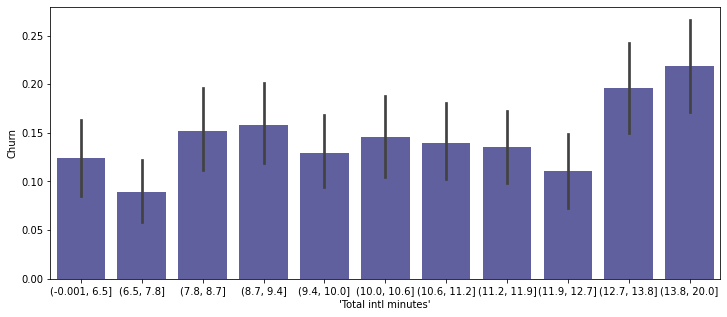

In [ ]:

plt.figure(figsize=(12,5))
sns.barplot(x= 'q_minutes',y='Churn',data=df,color="blue",saturation=0.25)
plt.xlabel("'Total intl minutes'")



Text(0.5, 0, 'Total intl minutes')

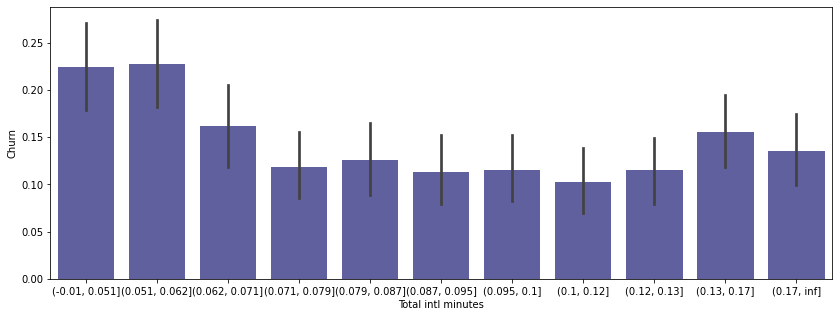

In [ ]:
plt.figure(figsize=(14,5))
sns.barplot(x= 'share',y='Churn',data=df,color="blue",saturation=0.25)
plt.xlabel("Total intl minutes")


In [ ]:
#<YOUR TURN>
#make new variable  that makes sense and plot similar plot of it

### Polynomial Features

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [ ]:
#you turn 
#apply polinomial features instead of Kbindiskretizer and calculate accuracy
#compare time of running (use magic %%time)

In [ ]:
%%time
import numpy as np
from sklearn.preprocessing import PolynomialFeatures



column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('binner',   PolynomialFeatures(2), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression',  LogisticRegressionCV(penalty='l2',Cs=[0.01,0.1,1],cv=5,max_iter=1500,
                                       random_state=random_state))
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test accuracy = ", accuracy_score(y_pred,y_test))
print("C= ",model[1].C_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Test accuracy =  0.9085457271364318
C=  [1.]
CPU times: user 40.1 s, sys: 20.8 s, total: 1min
Wall time: 35 s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


why polynomial features extracts more information from data than KBinsDiscretizer?

Is it worth to try polynomial featues of degree more than 2?

### GD  & SGD  for linear regresion

$$L(\beta | X, y) = \| X\beta - y \|_2 \to \inf_{\beta}$$

$$\beta = (X^TX)^{-1}X^Ty.$$

Matrix inversion is a very time consuming operation that sometimes requires an unacceptable amount of resources $(O(d^3))$ and can be unstable.

Therefore, parameters are often looked for using iterative methods. One of them is gradient descent.

Recall that in the step of the gradient transition, the values of the parameters at the next step are obtained from the values of the parameters at the current step by shifting towards the antigradient of the functional:

$$\beta^{(t+1)} = \beta^{(t)} - \eta_t \varepsilon \nabla L(\beta^{(t)}),$$
where $\eta_t \varepsilon$ — step decrease dynamics.

Formula for gradient in MSE case looks like:

$$\nabla L(\beta) = -2X^Ty + 2X^TX\beta = 2X^T(X\beta - y).$$
 
The complexity here is $O(dN)$. Stochastic gradient descent differs from basic gradient descent by replacing the gradient with an unbiased estimate for one or more objects. In this case, the complexity becomes $ O (kd) $, where $ k $ is the number of objects by which the gradient is estimated, $ k << N $. This partly explains the popularity of stochastic optimization techniques.

### Vizualization of GD & SGD

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)

Populating the interactive namespace from numpy and matplotlib


Let's generate a matrix of objects - features $ X $ and a vector of weights $ \beta_ {true} $, calculate the vector of target numbers $ y $ as $ X\beta_ {true} $ and add Gaussian noise:

In [ ]:
np.random.seed(16)
n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

beta_true = np.random.normal(size=(n_features, ))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[None, :]  # for different scales
Y = X.dot(beta_true) + np.random.normal(0, 1, (n_objects))
beta_0 = np.random.uniform(-2, 2, (n_features))

Let us train linear regression for MSE on the obtained data using full gradient descent - thereby we obtain a vector of parameters.

In [ ]:
beta = beta_0.copy()
beta_list = [beta.copy()]
step_size = 1e-2

for i in range(num_steps):
    beta -= 2 * step_size * np.dot(X.T, np.dot(X, beta) - Y) / Y.shape[0]
    beta_list.append(beta.copy())
beta_list = np.array(beta_list)

In [ ]:
#beta_list

let's show a sequence of parameter estimates $\beta^{(t)}$ obtained during iterations. The red dot is $\beta_{true}$.

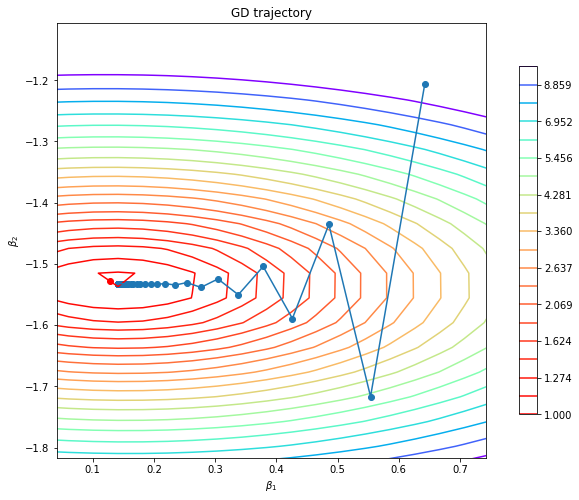

In [ ]:
# compute level set
A, B = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))

levels = np.empty_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        beta_tmp = np.array([A[i, j], B[i, j]])
        levels[i, j] = np.mean(np.power(np.dot(X, beta_tmp) - Y, 2))


plt.figure(figsize=(12, 8))
plt.title('GD trajectory')
plt.xlabel(r'$\beta_1$')
plt.ylabel(r'$\beta_2$')
plt.xlim((beta_list[:, 0].min() - 0.1, beta_list[:, 0].max() + 0.1))
plt.ylim((beta_list[:, 1].min() - 0.1, beta_list[:, 1].max() + 0.1))
plt.gca().set_aspect('equal')

# visualize the level set
CS = plt.contour(A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r)
CB = plt.colorbar(CS, shrink=0.8, extend='both')

# visualize trajectory
plt.scatter(beta_true[0], beta_true[1], c='r')
plt.scatter(beta_list[:, 0], beta_list[:, 1])
plt.plot(beta_list[:, 0], beta_list[:, 1])

plt.show()

We now visualize the trajectories of the stochastic gradient descent, repeating the same steps, while evaluating the gradient from the subsample.

In [ ]:
beta = beta_0.copy()
beta_list = [beta.copy()]
step_size = 0.2

for i in range(num_steps):
    sample = np.random.randint(n_objects, size=batch_size)
    beta -= 2 * step_size * np.dot(X[sample].T, np.dot(X[sample], beta) - Y[sample]) / Y.shape[0]
    beta_list.append(beta.copy())
beta_list = np.array(beta_list)

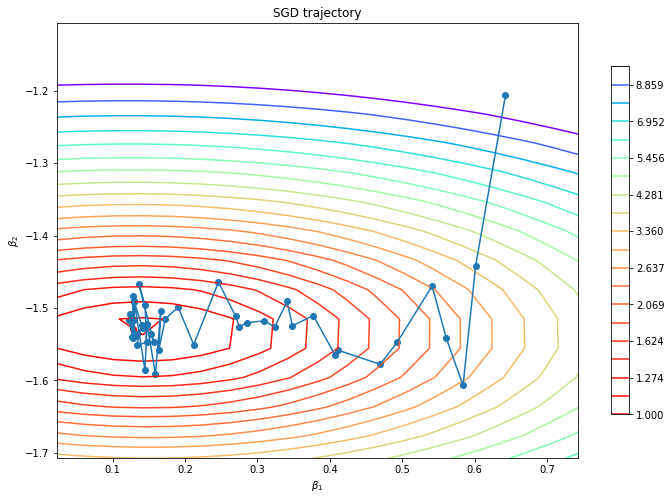

In [ ]:
# compute level set
A, B = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))

levels = np.empty_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        beta_tmp = np.array([A[i, j], B[i, j]])
        levels[i, j] = np.mean(np.power(np.dot(X, beta_tmp) - Y, 2))


plt.figure(figsize=(12, 8))
plt.title('SGD trajectory')
plt.xlabel(r'$\beta_1$')
plt.ylabel(r'$\beta_2$')
plt.xlim((beta_list[:, 0].min() - 0.1, beta_list[:, 0].max() + 0.1))
plt.ylim((beta_list[:, 1].min() - 0.1, beta_list[:, 1].max() + 0.1))
plt.gca().set_aspect('equal')

# visualize the level set
CS = plt.contour(A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r)
CB = plt.colorbar(CS, shrink=0.8, extend='both')

# visualize trajectory
plt.scatter(beta_true[0], beta_true[1], c='r')
plt.scatter(beta_list[:, 0], beta_list[:, 1])
plt.plot(beta_list[:, 0], beta_list[:, 1])

plt.show()

As you can see, the stochastic gradient method "wanders" around the optimum. This is due to the selection of the step of the gradient descent $ \eta_k $. The fact is that for the stochastic gradient descent to converge, the sequence of steps $ \eta_k $ must satisfy the Robbins-Monroe conditions:
$$
\sum_{k = 1}^\infty \eta_k = \infty, \qquad \sum_{k = 1}^\infty \eta_k^2 < \infty.
$$
Intuitively, this means the following:

1. the sequence must diverge so that the optimization method can reach any point in space,
2. but at the same time decrease quickly enough for the method to converge.

Let's try to look at the SGD trajectories, the sequence of steps satisfies the Robbins-Monroe conditions:

In [ ]:
beta = beta_0.copy()
beta_list = [beta.copy()]
step_size_0 = 0.45
num_steps=300
for i in range(num_steps):
    step_size = step_size_0 / ((i+1)**0.6)
    sample = np.random.randint(n_objects, size=batch_size)
    beta -= 2 * step_size * np.dot(X[sample].T, np.dot(X[sample], beta) - Y[sample]) / Y.shape[0]
    beta_list.append(beta.copy())
beta_list = np.array(beta_list)

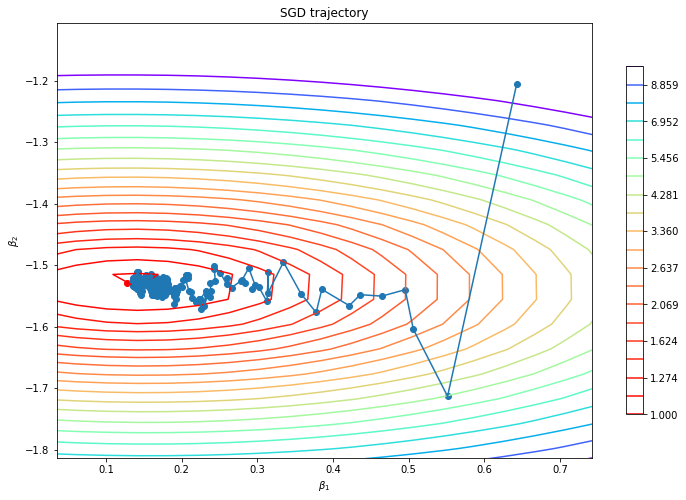

In [ ]:
# compute level set
A, B = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))

levels = np.empty_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        beta_tmp = np.array([A[i, j], B[i, j]])
        levels[i, j] = np.mean(np.power(np.dot(X, beta_tmp) - Y, 2))


plt.figure(figsize=(12, 8))
plt.title('SGD trajectory')
plt.xlabel(r'$\beta_1$')
plt.ylabel(r'$\beta_2$')
plt.xlim((beta_list[:, 0].min() - 0.1, beta_list[:, 0].max() + 0.1))
plt.ylim((beta_list[:, 1].min() - 0.1, beta_list[:, 1].max() + 0.1))
#plt.gca().set_aspect('equal')

# visualize the level set
CS = plt.contour(A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r)
CB = plt.colorbar(CS, shrink=0.8, extend='both')

# visualize trajectory
plt.scatter(beta_true[0], beta_true[1], c='r')
plt.scatter(beta_list[:, 0], beta_list[:, 1])
plt.plot(beta_list[:, 0], beta_list[:, 1])

plt.show()

### Comparison of convergence rates

In [ ]:
# data generation
n_features = 50
n_objects = 1000
num_steps = 200
batch_size = 2

beta_true = np.random.uniform(-2, 2, n_features)

X = np.random.uniform(-10, 10, (n_objects, n_features))
Y = X.dot(beta_true) + np.random.normal(0, 5, n_objects)

In [ ]:
step_size_sgd = 1
step_size_gd = 1e-2
beta_sgd = np.random.uniform(-4, 4, n_features)
beta_gd = beta_sgd.copy()
residuals_sgd = [np.mean(np.power(np.dot(X, beta_sgd) - Y, 2))]
residuals_gd = [np.mean(np.power(np.dot(X, beta_gd) - Y, 2))]

for i in range(num_steps):
    step_size = step_size_sgd / ((i+1) ** 0.51)
    sample = np.random.randint(n_objects, size=batch_size)
    beta_sgd -= 2 * step_size * np.dot(X[sample].T, np.dot(X[sample], beta_sgd) - Y[sample]) / Y.shape[0]
    residuals_sgd.append(np.mean(np.power(np.dot(X, beta_sgd) - Y, 2)))
    
    beta_gd -= 2 * step_size_gd * np.dot(X.T, np.dot(X, beta_gd) - Y) / Y.shape[0]
    residuals_gd.append(np.mean(np.power(np.dot(X, beta_gd) - Y, 2)))

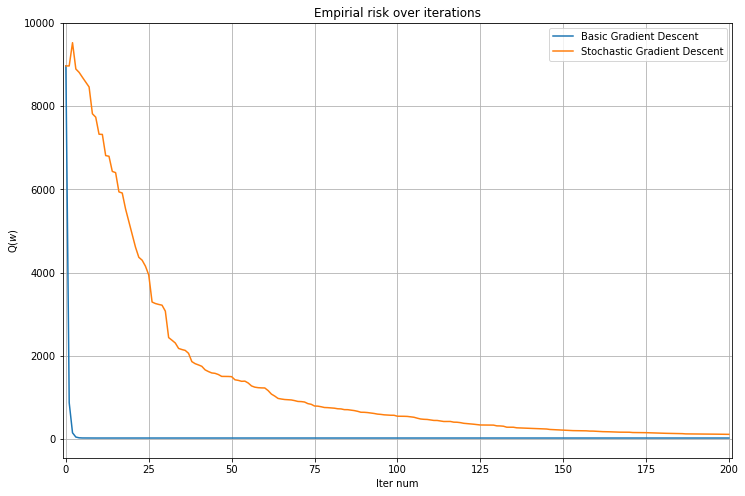

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(range(num_steps+1), residuals_gd, label='Basic Gradient Descent')
plt.plot(range(num_steps+1), residuals_sgd, label='Stochastic Gradient Descent')
plt.title('Empirial risk over iterations')
plt.xlim((-1, num_steps+1))
plt.legend()
plt.xlabel('Iter num')
plt.ylabel(r'Q($w$)')
plt.grid()
plt.show()

### SGD Classifier in sklearn


class sklearn.linear_model.SGDClassifier(loss='hinge', *, penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False)

- loss , default=’hinge’. The loss function to be used. Defaults to ‘hinge’, which gives a linear SVM. The possible options are ‘hinge’, ‘log’, ‘modified_huber’, ‘squared_hinge’, ‘perceptron’, or a regression loss: ‘squared_error’, ‘huber’, ‘epsilon_insensitive’, or ‘squared_epsilon_insensitive’.
- penalty{‘l2’, ‘l1’, ‘elasticnet’}, default=’l2’
- alpha , default=0.0001 regularization term
- max_iter, default=1000 The maximum number of passes over the training data (aka epochs).
- learning_rate , default=’optimal’:
  -  ‘constant’: eta = eta0
  - ‘optimal’: eta = 1.0 / (alpha * (t + t0)) where t0 is chosen by a heuristic proposed by Leon Bottou.
  - ‘invscaling’: eta = eta0 / pow(t, power_t)
  - ‘adaptive’: eta = eta0, as long as the training keeps decreasing. Each time n_iter_no_change consecutive epochs fail to decrease the training loss by tol or fail to increase validation score by tol if early_stopping is True, the current learning rate is divided by 5.
 - eta0 , default=0.0 The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules. The default value is 0.0 as eta0 is not used by the default schedule ‘optimal’.
 
#### The advantages of Stochastic Gradient Descent are:

- Efficiency.

- Ease of implementation (lots of opportunities for code tuning).

#### the disadvantages of Stochastic Gradient Descent include:

- SGD requires a number of hyperparameters such as the regularization parameter and the number of iterations.

- SGD is sensitive to feature scaling.

In [ ]:
results=[]
for eps in [0.00001,0.0001,0.01,0.05,0.1,0.2,0.5,1.0]:
    from sklearn.linear_model import SGDClassifier
    pipeline = Pipeline(steps=[
        ('ohe_and_scaling', column_transformer),
        ('regression', SGDClassifier(max_iter=100,loss='log',penalty='l2',alpha=1, 
                                     learning_rate='constant',eta0=eps,
                                     random_state=random_state,n_iter_no_change=20))
    ])

    model = pipeline.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(" Test accuracy = %.4f learning rate= %.6f n_iter_=%.f" % (accuracy_score(y_pred,y_test), eps,model[1].n_iter_))
    results.append((accuracy_score(y_pred,y_test), eps))


 Test accuracy = 0.8756 learning rate= 0.000010 n_iter_=29
 Test accuracy = 0.5757 learning rate= 0.000100 n_iter_=44
 Test accuracy = 0.8681 learning rate= 0.010000 n_iter_=29
 Test accuracy = 0.8681 learning rate= 0.050000 n_iter_=29
 Test accuracy = 0.8681 learning rate= 0.100000 n_iter_=29
 Test accuracy = 0.8681 learning rate= 0.200000 n_iter_=29
 Test accuracy = 0.8681 learning rate= 0.500000 n_iter_=29
 Test accuracy = 0.8681 learning rate= 1.000000 n_iter_=45


In [ ]:
print("Max test accuracy = %.4f \nlearning rate= %.6f" % 
      (max(results, key = lambda i : i[0])[0],max(results, key = lambda i : i[0])[1]))

Max test accuracy = 0.8756 
learning rate= 0.000010


Completely similar to the previous task, we will train the model with the learning_rate='adaptive' parameter (divides eps by 5 if there is no improvement in the training loss at several iterations . If you set too large eps, then it is very likely that it will not converge, it depends, in particular , from the n_iter_no_change parameter.

In [ ]:
results=[]
for eps in [1,5,10,100]:
    from sklearn.linear_model import SGDClassifier
    pipeline = Pipeline(steps=[
        ('ohe_and_scaling', column_transformer),
        ('regression', SGDClassifier(max_iter=200,loss='log',penalty='l2',alpha=0.1,
                                     learning_rate='adaptive',eta0=eps,
                                     random_state=random_state,n_iter_no_change=2 ))
    ])

    model = pipeline.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(eps,accuracy_score(y_pred,y_test),model[1].n_iter_)
    results.append((accuracy_score(y_pred,y_test), eps))

1 0.8395802098950524 87
5 0.841079460269865 94
10 0.8335832083958021 99
100 0.8125937031484258 98


In [ ]:
#<YOUR TURN>
#try to change parameteres to get better results